<a href="https://colab.research.google.com/github/MohamedTheSobhy/Analyze-A-B-Test-Results/blob/main/Spamsms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# قراءة البيانات
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]     # v1 = label, v2 = message
df.columns = ['label', 'message']  # إعادة تسمية الأعمدة

In [7]:
# تحويل التصنيفات
df['label'] = df['label'].map({'ham':0, 'spam':1})

# تقسيم البيانات
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تحويل النصوص إلى أرقام باستخدام TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)
y_pred_log = log_model.predict(X_test_tfidf)
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

Logistic Regression Accuracy: 0.9524663677130045


In [9]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)

SVM Accuracy: 0.979372197309417


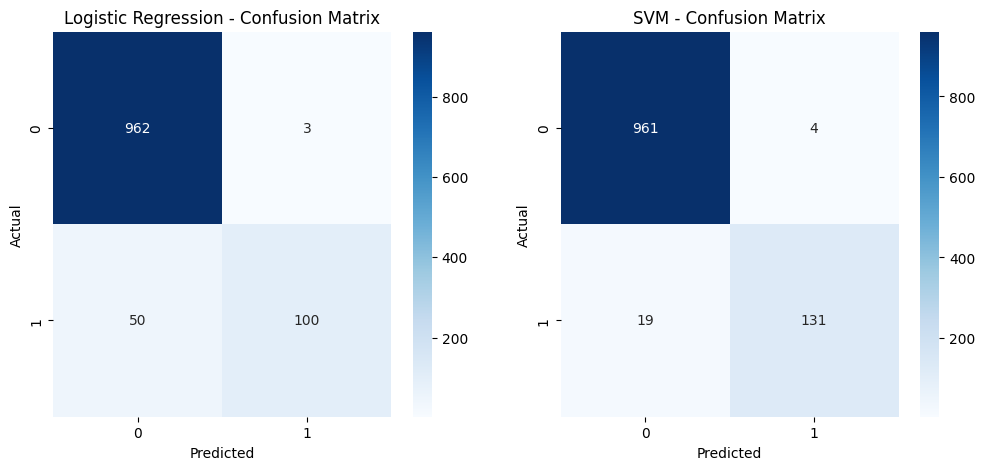

In [10]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(12,5))

# Logistic Regression
plt.subplot(1,2,1)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# SVM
plt.subplot(1,2,2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()